# Lesson 2 - Data Structures

## Exercise 1:

In [1]:
# A helpful constant. You can leave this part unchanged
import math
pi = math.pi

# YOUR CODE BELOW
r = 5.5
h = 10.7

cylinder_volume = h*pi*r**2

print(cylinder_volume)

1016.8550021506762


## Exercise 2

In [2]:
a = "Hello, egg world!"

sol = a[:7]+a[11:]
print(sol)

Hello, world!


### part 2

In [3]:
sol = a[:a.index("egg")] + a[3+a.index("egg"):]
print(sol)

Hello,  world!


# Lesson 3 - Control Flow

## Exercise 1

In [4]:
primes = []
for num in range(2, 1000):
    found_factor = False
    for i in range(2, num):
        if (num % i) == 0:
            found_factor = True
    if(not found_factor):
        primes.append(num)

print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


In [5]:
# Forward checking for primes (eliminates multiples of a prime to reduce
# the numbers that need to be checked)
is_prime = [1]*1000
is_prime[0] = 0
is_prime[1] = 0

primes_result = []

for i in range(len(is_prime)):
    if is_prime[i] == 0:
        pass
    else:
        primes_result.append(i)
        n = 2
        while(n*i < len(is_prime)):
            is_prime[n*i] = 0
            n += 1
    
print(primes_result)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


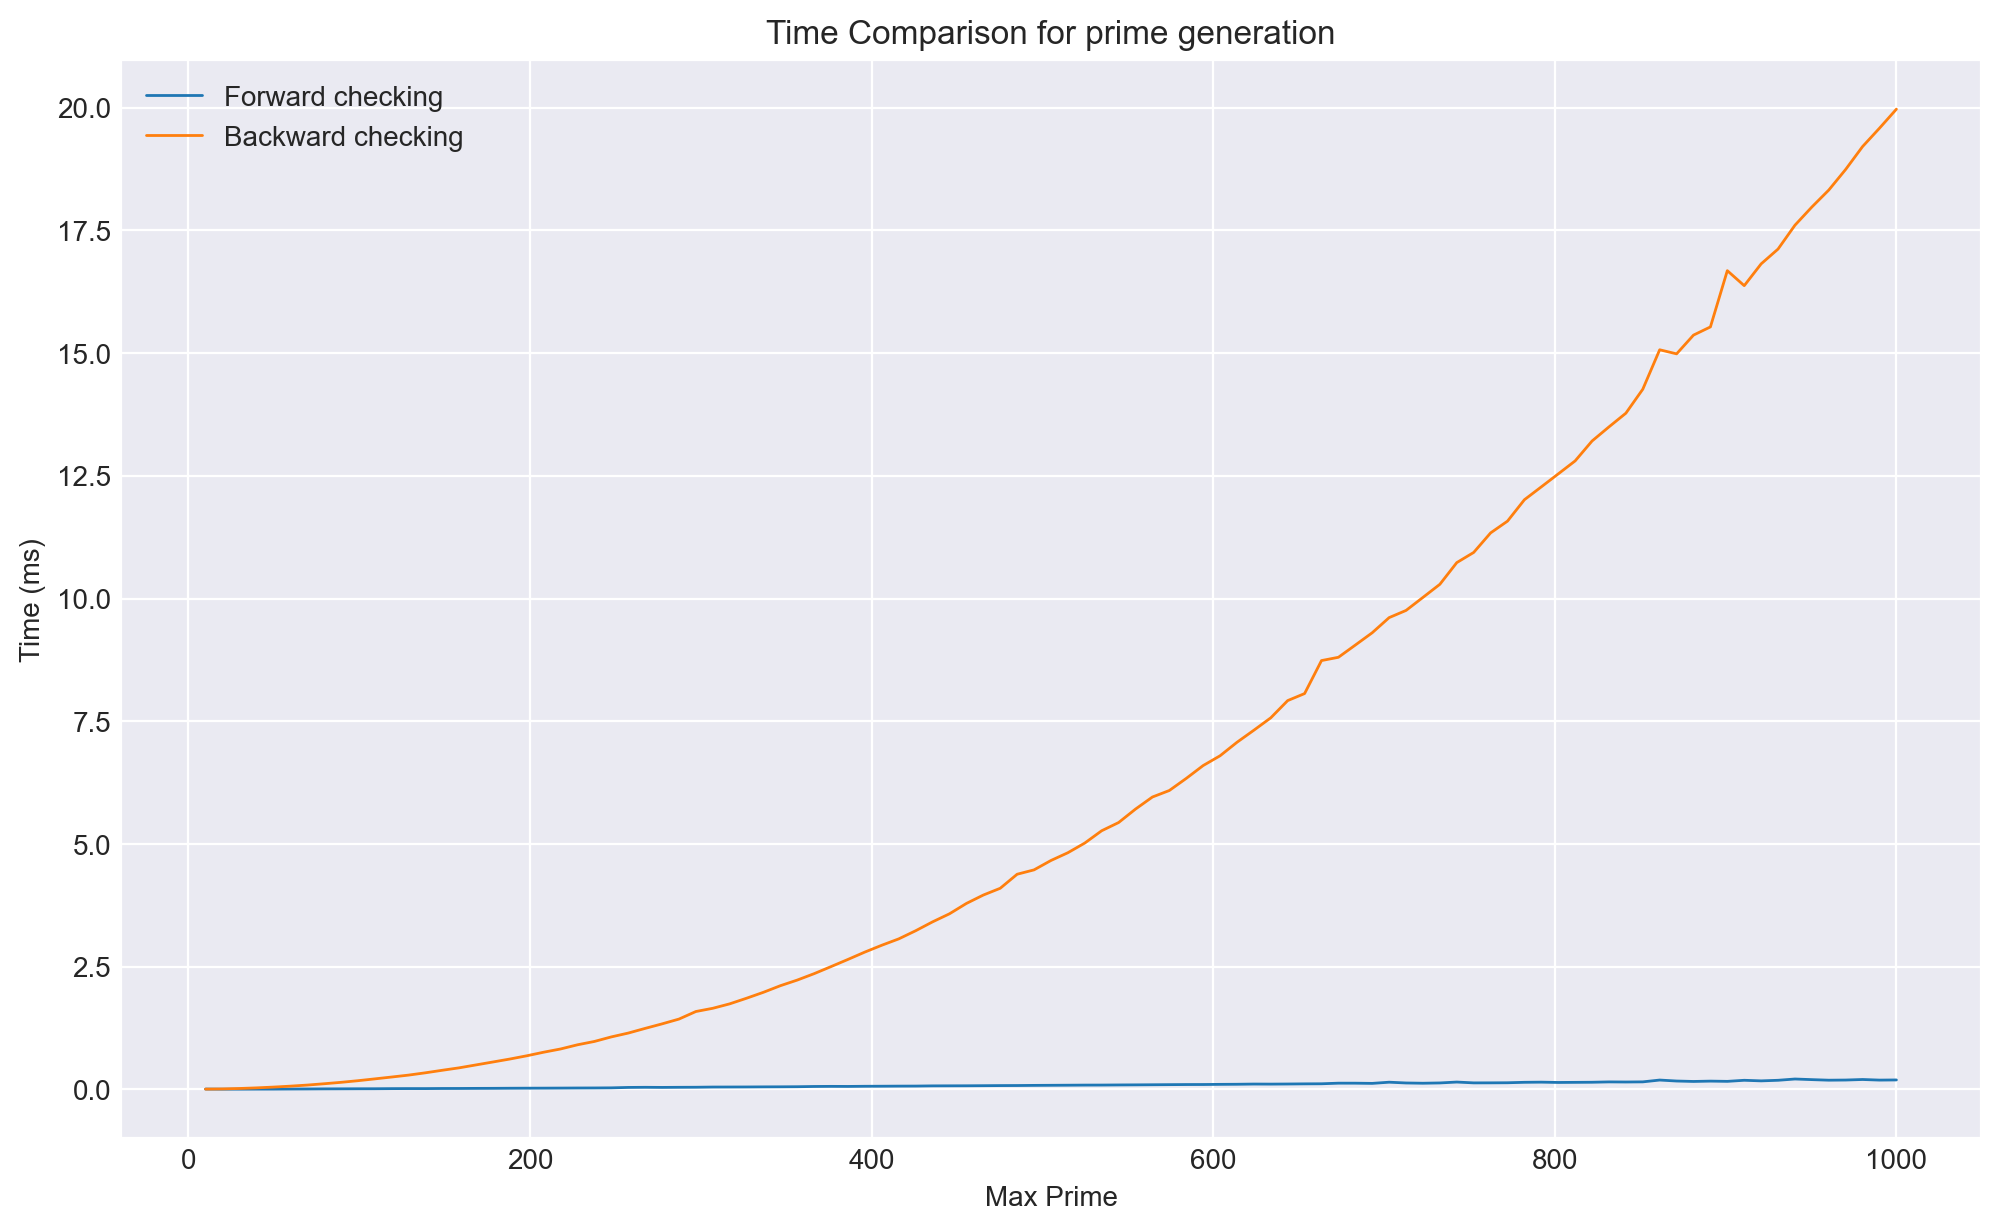

In [6]:
# Comparison:

import time
import numpy as np
import matplotlib.pyplot as plt

def get_primes_backward(n):
    primes = []
    for num in range(2, n):
        found_factor = False
        for i in range(2, num):
            if (num % i) == 0:
                found_factor = True
        if(not found_factor):
            primes.append(num)
    return primes

def get_primes_forward(n):
    primes = [1]*n
    
    primes_result = []
    
    for i in range(2, len(primes)):
        if primes[i] == 0:
            pass
        else:
            primes_result.append(i)
            j = 2
            while(j*i < len(primes)):
                primes[j*i] = 0
                j+=1

    return primes_result

forward_times = []
backward_times = []

ns = np.linspace(10, 1000, 101)

for n in ns:
    start_forward = time.time()
    forward_primes = get_primes_forward(int(n))
    end_forward = time.time()
    forward_times.append((end_forward-start_forward)*10**3)

    start_backward = time.time()
    backward_primes = get_primes_backward(int(n))
    end_backward = time.time()
    backward_times.append((end_backward-start_backward)*10**3)
    
plt.figure(figsize=(12, 7))
plt.title("Time Comparison for prime generation")
plt.plot(ns, forward_times, label="Forward checking")
plt.plot(ns, backward_times, label="Backward checking")
plt.xlabel("Max Prime")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

## Exercise 2

In [7]:
primes = []
for num in range(2, 1000):
    for i in range(2, num):
        if (num % i) == 0:
            break
    else:
        primes.append(num)

print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


### Exercise 3

Write a program (using a ``while`` loop) that will find the Fibonacci sequence up to (and excluding) 100000. The two first numbers are 0 and 1, and every subsequent number is the sum of the two previous ones, so the sequence starts ``[0, 1, 1, 2, 3, 5, ...]``.

Optional: Store the sequence inside a Python list, and only print out the whole list to the screen once all the numbers are available. Then, check whether any of the numbers in the sequence are a square (e.g. ``0*0``, ``1*1``, ``2*2``, ``3*3``, ``4*4``) and print out those that are.

In [8]:
a = 0
b = 1
while a < 100000:
    print(a, end=' ')
    c = a  # save a to old variable
    a = b
    b = c + b


0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 

OR

In [9]:
a, b = 0, 1
while a < 100000:
    print(a, end=' ')
    a, b = b, a + b

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 

OR

In [10]:
fib = [0, 1]
while fib[-1] + fib[-2] < 100000:
    fib.append(fib[-1] + fib[-2])
print(fib)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025]


In [11]:
squares_list = []
for num in fib:
    for test_factor in range(math.ceil(num**(1/2))+1):
        if(test_factor**2 == num):
            squares_list.append(num)

print(squares_list)

[0, 1, 1, 144]


# Lesson 4

## Exercise 1

In [12]:
def is_prime(number):
    """Return a list of all primes up to `number`."""
    
    for num in range(2, 1+(number//2)):
        if (number % num) == 0:
            return False
    return True

print(is_prime(2))
print(is_prime(3))
print(is_prime(8))
print(is_prime(71))

True
True
False
True


## Exercise 2

In [13]:
def factorial(n):
    result = 1
    while(n>1):
        result *= n
        n-=1
    return result

print(factorial(4))

24
